<a href="https://colab.research.google.com/github/TuanPham2024/AIO-2024-HackathonDemo/blob/main/Mod03_W2_K_Nearest_Neighbors_and_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***1. K-Nearest Neighbors***

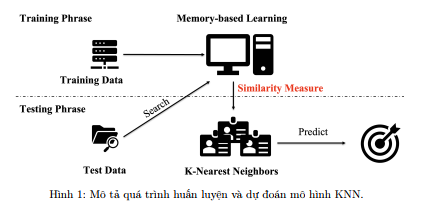

In [4]:
#Q3:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)
print("iris_X")
print(iris_X[0:4])

print("iris_y")
print(iris_y)

# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
iris_X,
iris_y,
test_size=0.2,
random_state = 42
)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) # Initialize the KNN classifier with k=3
knn_classifier.fit(X_train, y_train)                 # Fit the classifier on the training data

# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)

print("X_test    = ",X_test[:2])
print("y_predict = ", y_pred)


# Calculate accuracy
acc_score = accuracy_score(y_test, y_pred)


print("acc_score = ", acc_score)

iris_X
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
iris_y
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
X_test    =  [[ 0.35451684 -0.58505976  0.55777524  0.02224751]
 [-0.13307079  1.65083742 -1.16139502 -1.17911778]]
y_predict =  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
acc_score =  1.0


**Câu hỏi 5.** Sắp xếp các đoạn code sau đây để được thứ tự đúng cho bài toán dự đoán chỉ số bệnh trên bô dữ liệu Diabetes dử dụng mô hình KNN?

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Paragraph A: # Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Paragraph D: Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X,
    diabetes_y,
    test_size=0.2,
    random_state=42
    )

# Paragraph B: # Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Paragraph C: # Build KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)



KNeighborsRegressor()

**Câu hỏi 6.** Phương pháp nào không được sử dùng để biểu diễn văn bản thành các giá trị vector là:
a) Bag-of-Word
b) TF-IDF
c) One Hot Encoding
*d) F-Score*

**Câu hỏi 7.** KNN for TEXT Classification : "IMDB" Dataset.

Hoàn thành đoạn code sau đây cho bài toán phân loại văn bản sử dụng mô hình KNN trên bộ dữ liệu đánh giá

In [ ]:
!pip check

In [ ]:
!pip install --upgrade ipython


In [ ]:
!pip install --upgrade cudf-cu12 ibis-framework

In [ ]:
!pip install --upgrade bigframes

In [ ]:
# Cài đặt thư viện cần thiết
!pip install -q datasets  # Cài đặt thư viện 'datasets' để tải bộ dữ liệu IMDB

In [3]:
import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score  # Import hàm accuracy_score để tính toán độ chính xác

# Bước 1: Tải bộ dữ liệu IMDB
imdb = load_dataset("imdb")                 # Tải bộ dữ liệu IMDB từ Hugging Face Datasets. Bộ dữ liệu này bao gồm các đánh giá phim (text) và nhãn tương ứng (label).
imdb_train, imdb_test = imdb['train'], imdb['test']  # Tách riêng tập huấn luyện và kiểm tra từ bộ dữ liệu IMDB.

# Bước 2: Chuyển đổi văn bản thành vector bằng Bag of Words (BoW) ->  # Giảm từ 'max_features=1000' xuống còn '500' đặc trưng -> giảm thời gian huấn luyện
vectorizer = CountVectorizer(max_features=500)                   # Tạo một đối tượng CountVectorizer để chuyển đổi văn bản thành vector, sử dụng tối đa 1000 từ phổ biến nhất.
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()  # Áp dụng vectorizer lên dữ liệu huấn luyện để chuyển đổi văn bản thành các vector đặc trưng.
X_test = vectorizer.transform(imdb_test['text']).toarray()        # Áp dụng vectorizer đã học từ tập huấn luyện lên dữ liệu kiểm tra.

# Chuyển đổi nhãn (labels) thành mảng NumPy
y_train = np.array(imdb_train['label'])  # Chuyển đổi nhãn của tập huấn luyện thành mảng NumPy để dễ dàng thao tác.
y_test = np.array(imdb_test['label'])    # Chuyển đổi nhãn của tập kiểm tra thành mảng NumPy.

# Bước 3: Chuẩn hóa các đặc trưng (features)
scaler  = StandardScaler()                 # Tạo một đối tượng StandardScaler để chuẩn hóa dữ liệu, nhằm đảm bảo các đặc trưng có trung bình = 0 và độ lệch chuẩn = 1.
X_train = scaler.fit_transform(X_train)    # Tính toán các giá trị trung bình và độ lệch chuẩn từ dữ liệu huấn luyện và chuẩn hóa dữ liệu.
X_test  = scaler.transform(X_test)         # Chuẩn hóa dữ liệu kiểm tra bằng cách sử dụng các giá trị đã tính toán từ tập huấn luyện (fit_transform).

# Bước 6: Giảm tài nguyên thời gian tính toán bằng  :'Truncated SVD' để giảm số chiều
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)  # Giảm xuống còn 100 chiều,  Truncated SVD để giảm số chiều của dữ liệu sau khi đã chuyển đổi bằng CountVectorizer

X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)


# Bước 4: Xây dựng mô hình K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
                                             # Tạo một đối tượng KNeighborsClassifier để xây dựng mô hình KNN.
                                             # n_neighbors=1: Mô hình sẽ xem xét 1 hàng xóm gần nhất để phân loại mỗi điểm dữ liệu.
                                             # algorithm='ball_tree': Sử dụng thuật toán Ball Tree để tối ưu tìm kiếm hàng xóm gần nhất, đặc biệt khi làm việc với dữ liệu lớn.

# knn_classifier.fit(X_train, y_train)         # Huấn luyện mô hình KNN bằng dữ liệu huấn luyện (X_train) và nhãn tương ứng (y_train).
knn_classifier.fit(X_train_reduced, y_train) # Huấn luyện mô hình KNN với dữ liệu đã giảm chiều


# Bước 5: Dự đoán và đánh giá mô hình
# y_pred = knn_classifier.predict(X_test)      # Sử dụng mô hình KNN đã huấn luyện để dự đoán nhãn của dữ liệu kiểm tra (X_test).
# accuracy = accuracy_score(y_test, y_pred)    # Tính toán độ chính xác bằng cách so sánh nhãn dự đoán (y_pred) với nhãn thực tế (y_test).
#                                              # accuracy_score trả về tỉ lệ phần trăm số dự đoán đúng.

y_pred = knn_classifier.predict(X_test_reduced) # Cách 2: Dự đoán và đánh giá mô hình với tập dữ liệu kiểm tra đã giảm chiều
accuracy = accuracy_score(y_test, y_pred)

# Bạn cũng có thể sử dụng F1-score thay cho độ chính xác nếu muốn:
# from sklearn.metrics import f1_score
# f1 = f1_score(y_test, y_pred, average='weighted')  # Tính F1-score có trọng số để phù hợp với các lớp không cân bằng.

print(f"Accuracy: {accuracy}")               # In ra độ chính xác của mô hình KNN dựa trên tập dữ liệu kiểm tra.


Accuracy: 0.67688


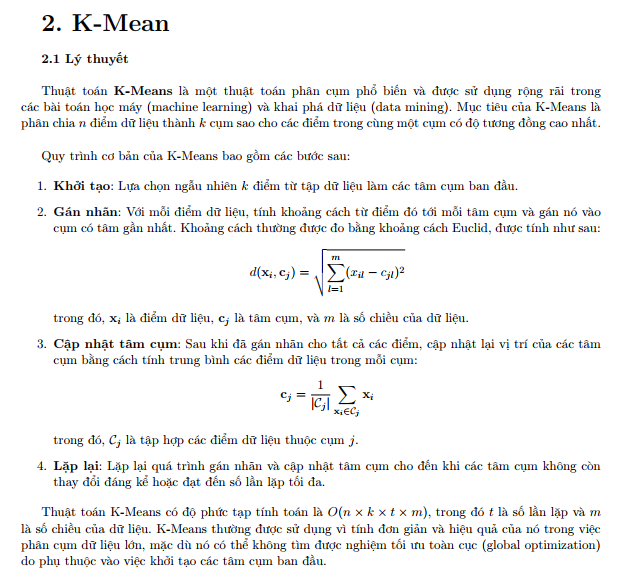

In [ ]:
# B1: hiện import các thư viện cần thiết:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

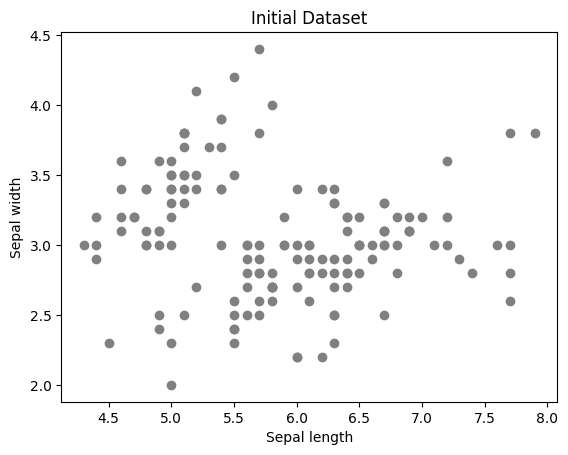

In [ ]:
# B2: load_iris để lấy bộ iris dataset từ thư viện sklearn.
# Sau đó lấy 2 features đầu và xem như bài toán của chúng ta đang thực hiện trên tập dữ liệu 2 chiều.

iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2]

# Plot data
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title("Initial Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k  # Số lượng cụm cần phân chia dữ liệu
        self.max_iters = max_iters  # Số lần lặp tối đa cho thuật toán
        self.centroids = None  # Biến để lưu trữ tọa độ của các centroid
        self.clusters = None  # Biến để lưu trữ thông tin các cụm mà mỗi điểm dữ liệu thuộc về

    def initialize_centroids(self, data):
        # Khởi tạo ngẫu nhiên các centroid từ dữ liệu
        np.random.seed(42)  # Đặt seed cho random để có thể tái hiện lại kết quả
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]
        # Lựa chọn k điểm ngẫu nhiên từ dữ liệu làm centroid ban đầu

    def euclidean_distance(self, x1, x2):
        # Tính khoảng cách Euclid giữa hai điểm x1 và x2
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        # Gán mỗi điểm dữ liệu vào cụm gần nhất
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        # Tính khoảng cách từ mỗi điểm dữ liệu đến tất cả các centroid

        return np.argmin(distances, axis=1)
        # Trả về chỉ số của cụm gần nhất cho mỗi điểm dữ liệu (mỗi hàng)

    def update_centroids(self, data):
        # Cập nhật lại centroid dựa trên các điểm dữ liệu mới gán vào cụm
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])
        # Tính giá trị trung bình của tất cả các điểm trong cùng một cụm để làm centroid mới

    def fit(self, data):
        # Hàm chính để thực thi thuật toán K-Means
        self.initialize_centroids(data)  # Bắt đầu bằng cách khởi tạo các centroid

        for i in range(self.max_iters):  # Lặp qua tối đa số lần max_iters
            self.clusters = self.assign_clusters(data)  # Gán cụm cho mỗi điểm dữ liệu
            self.plot_clusters(data, i)  # Hiển thị kết quả phân cụm sau mỗi vòng lặp

            new_centroids = self.update_centroids(data)  # Cập nhật centroid dựa trên cụm mới

            if np.all(self.centroids == new_centroids):  # Kiểm tra nếu centroid không đổi (hội tụ)
                break  # Nếu các centroid không thay đổi, dừng thuật toán

            self.centroids = new_centroids  # Cập nhật các centroid

        self.plot_final_clusters(data)  # Hiển thị cụm cuối cùng sau khi hội tụ

    def plot_clusters(self, data, iteration):
        # Hàm để vẽ các điểm dữ liệu và centroid cho mỗi lần lặp
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")  # Hiển thị số lần lặp
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

    def plot_final_clusters(self, data):
        # Hàm để vẽ các cụm cuối cùng và centroid sau khi thuật toán hội tụ
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()


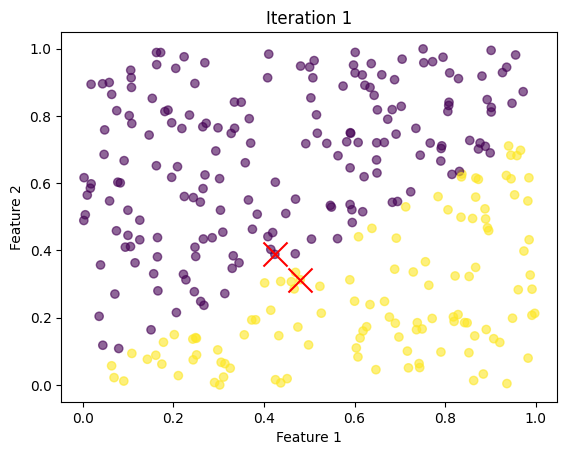

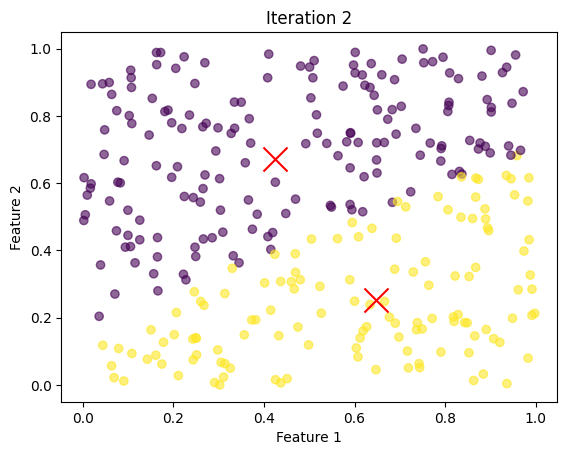

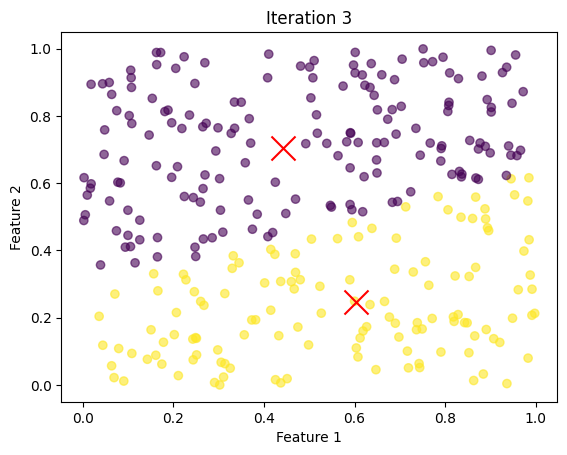

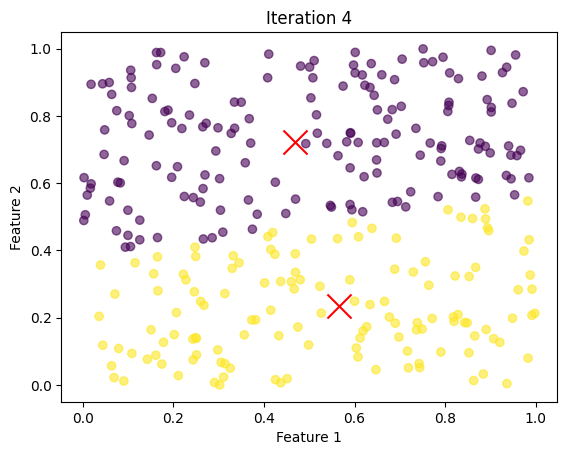

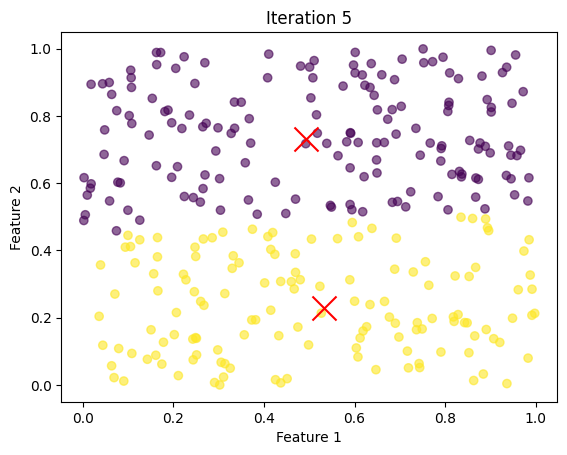

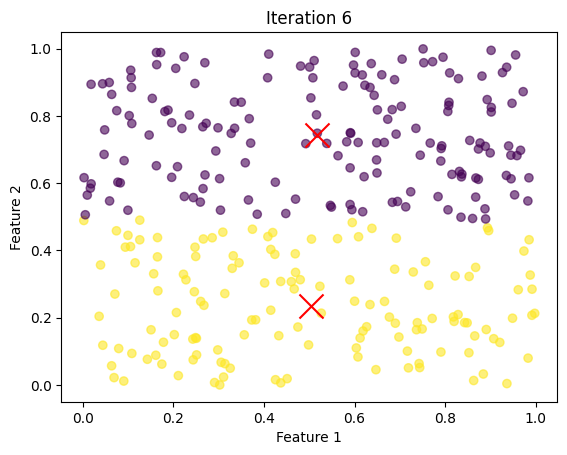

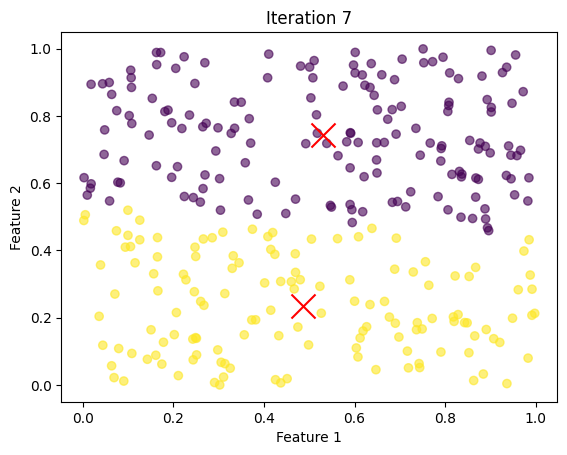

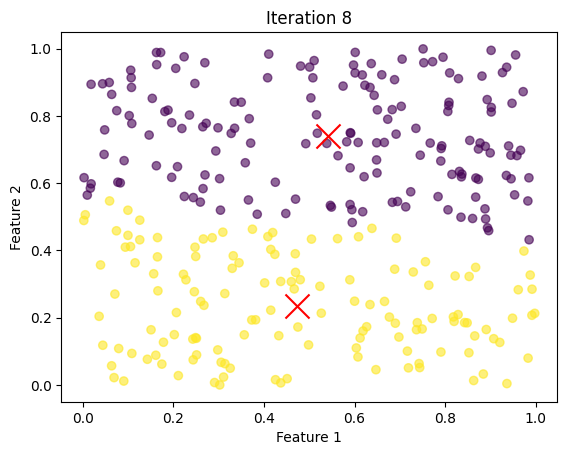

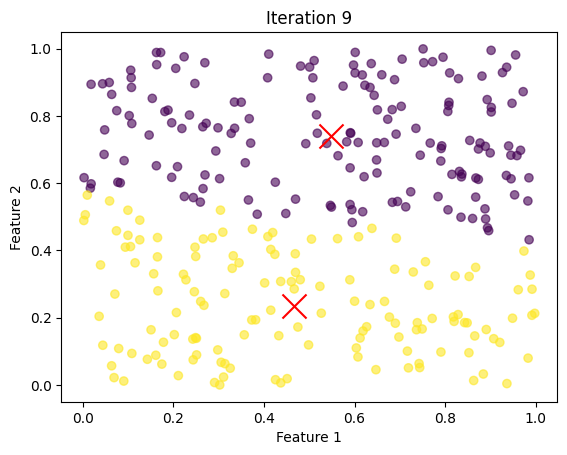

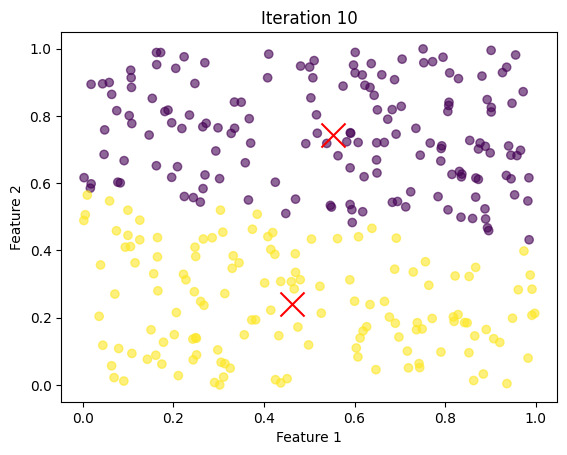

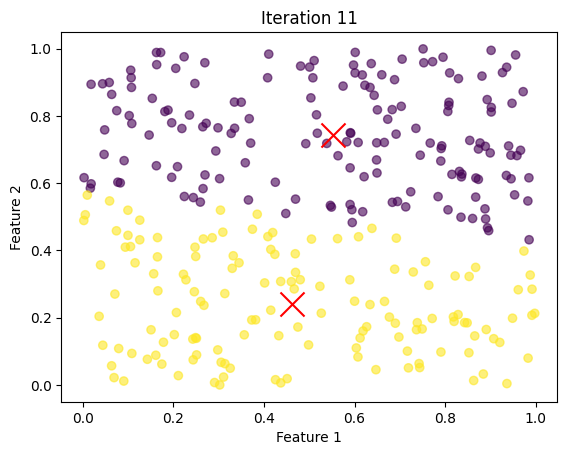

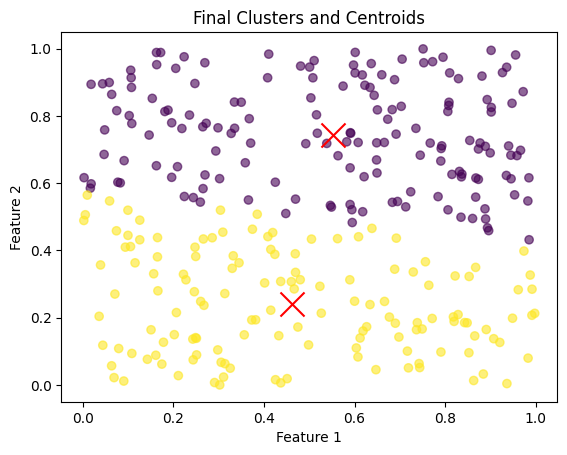

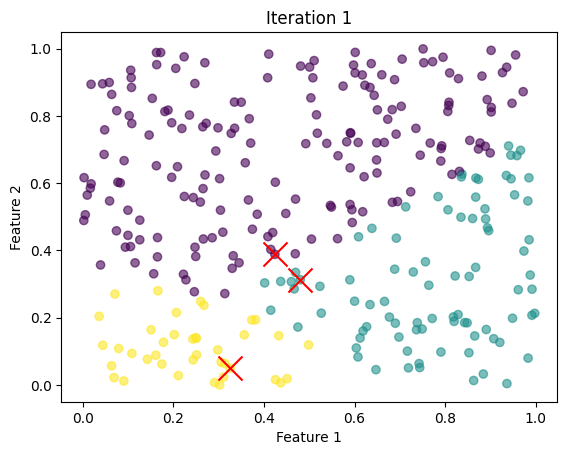

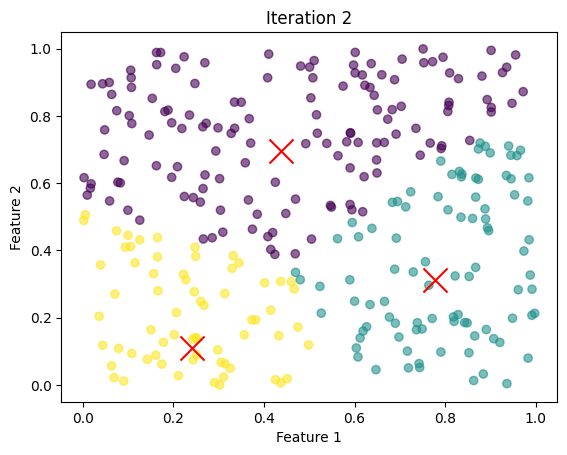

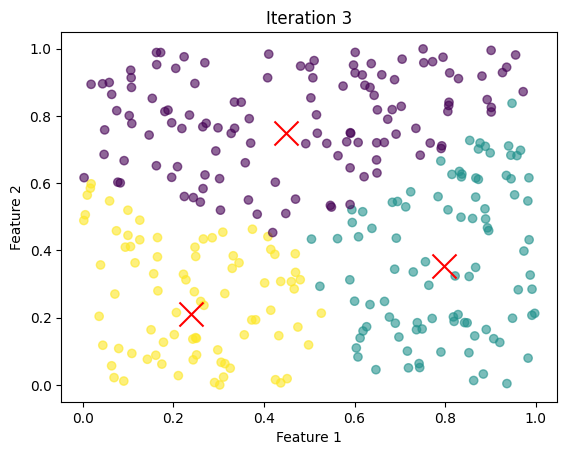

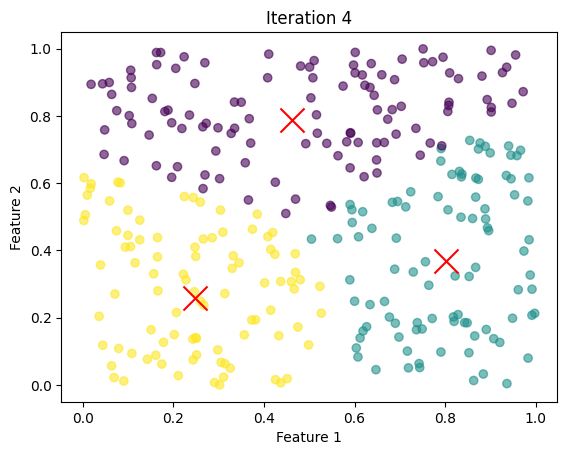

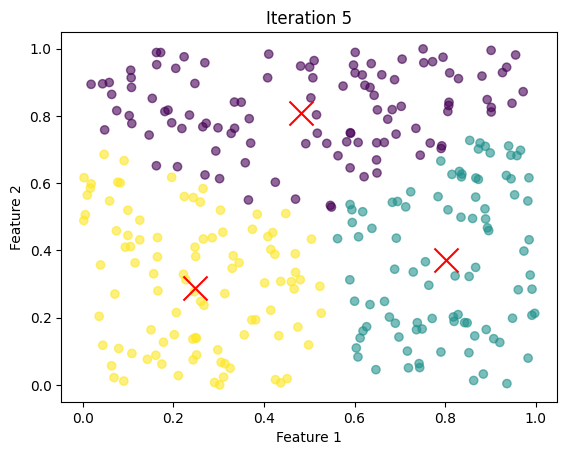

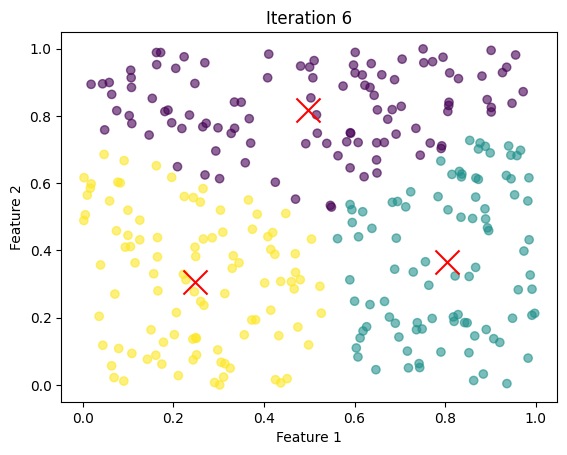

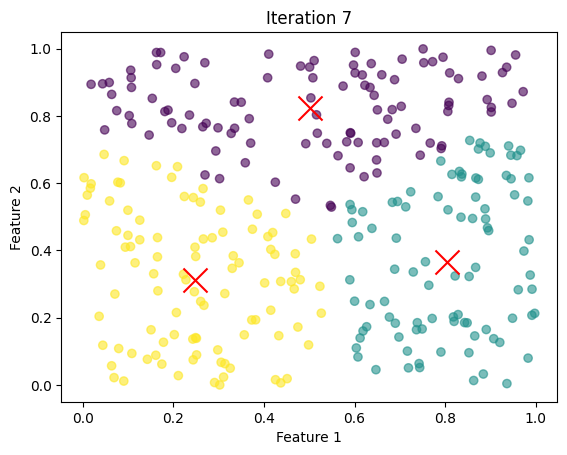

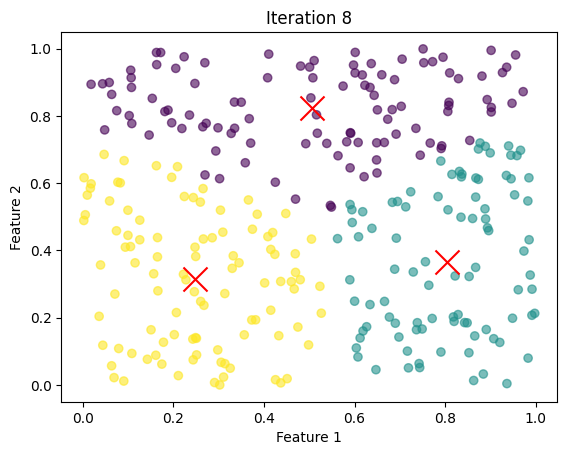

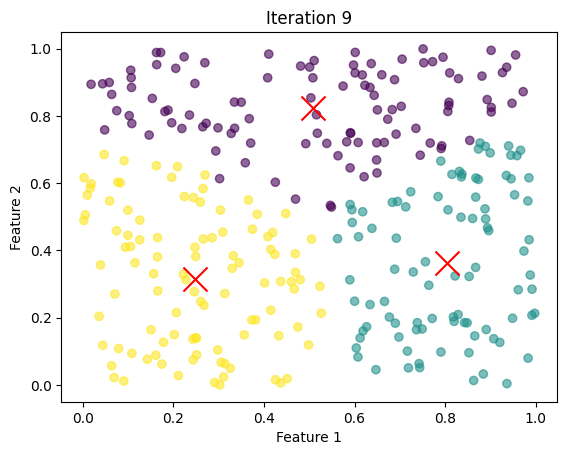

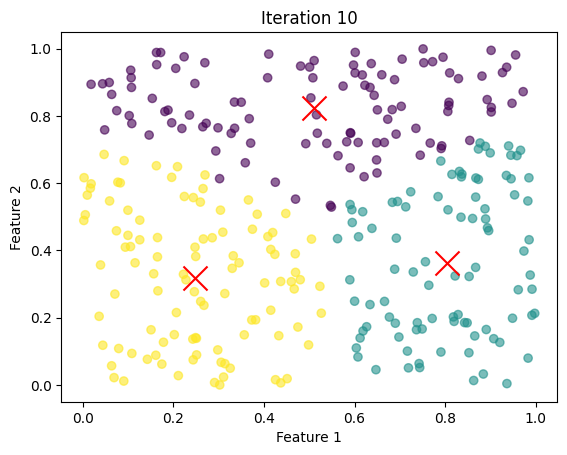

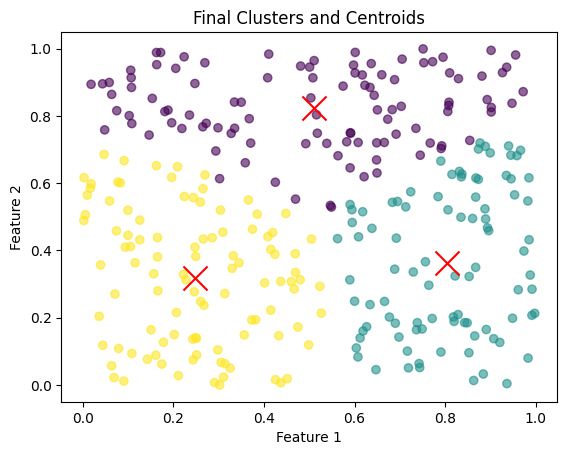

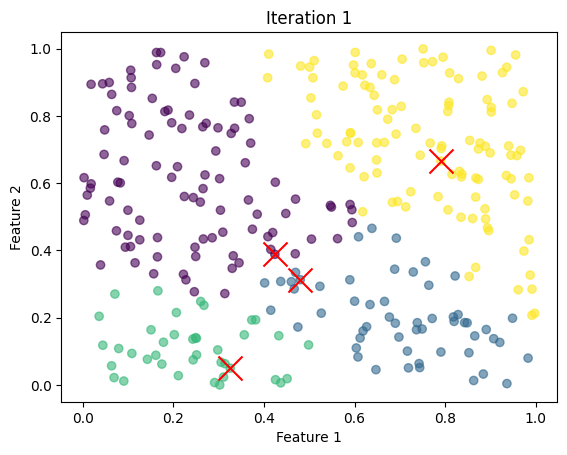

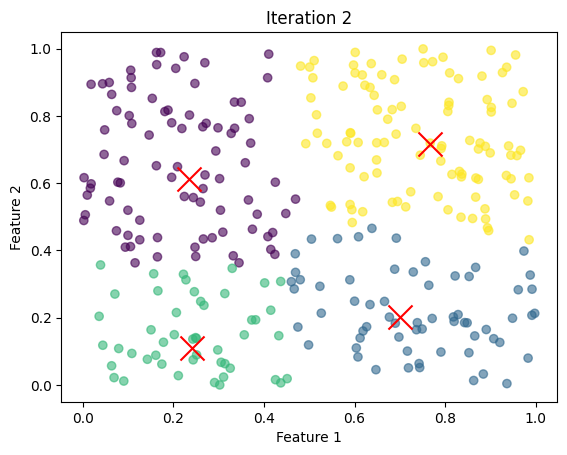

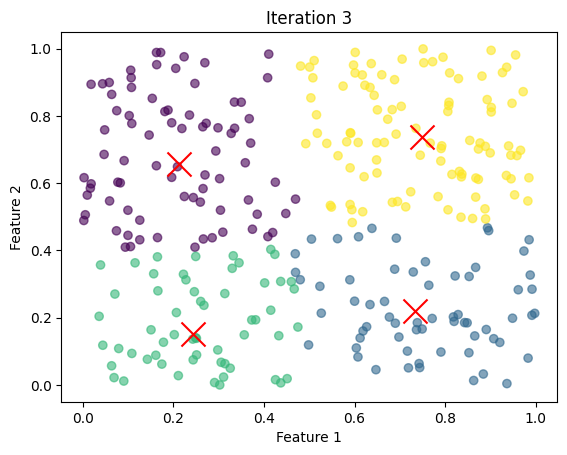

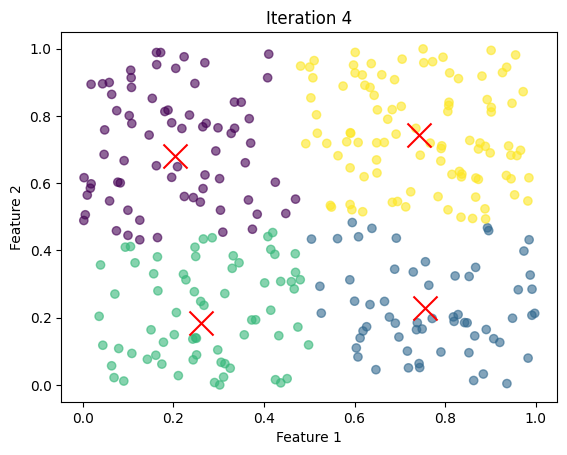

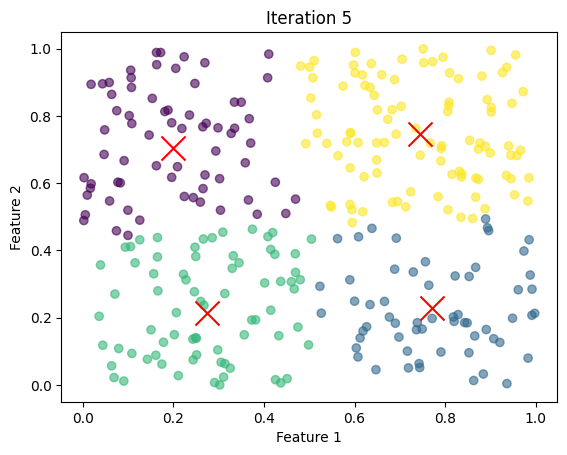

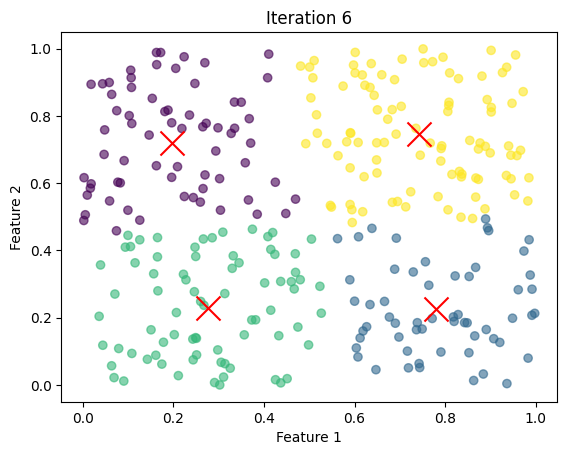

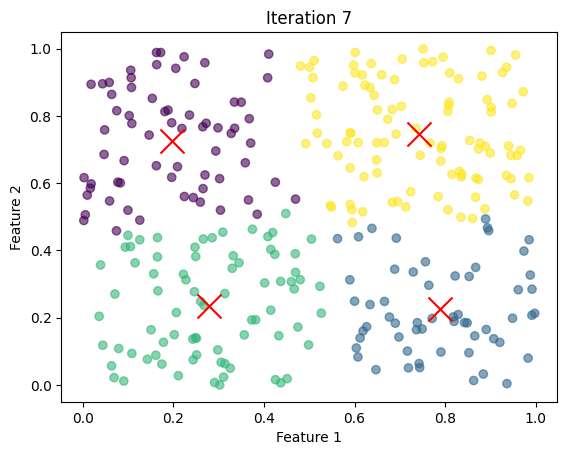

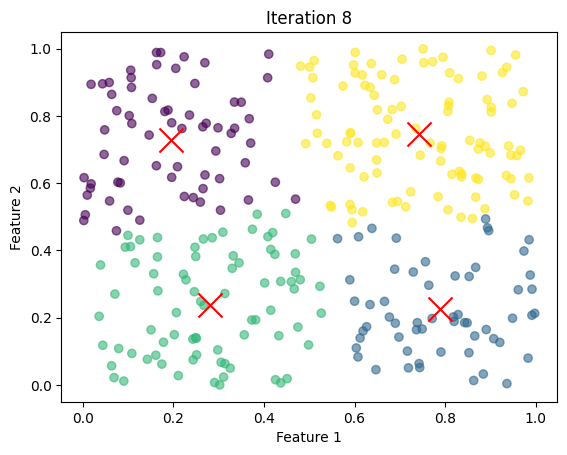

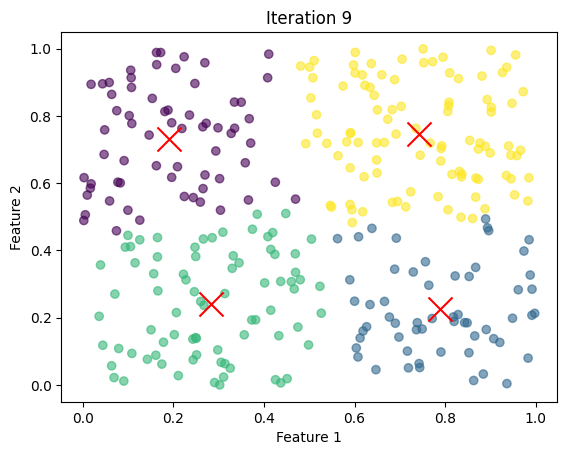

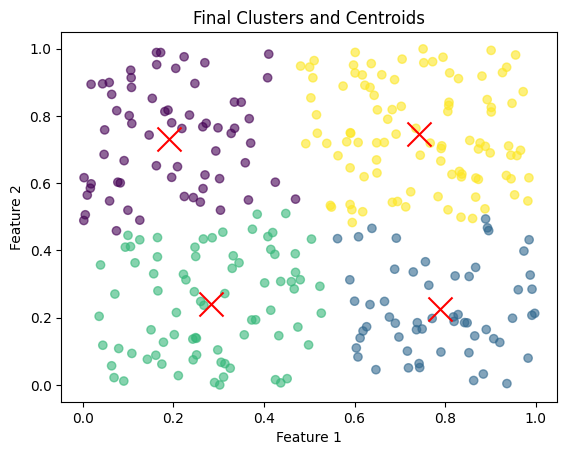

In [ ]:
# Tạo dữ liệu mẫu
data = np.random.rand(300, 2)  # 300 điểm dữ liệu với 2 đặc trưng ngẫu nhiên

# Chạy thuật toán K-Means với k=2, k=3, và k=4
kmeans = KMeans(k=2)
kmeans.fit(data)

kmeans = KMeans(k=3)
kmeans.fit(data)

kmeans = KMeans(k=4)
kmeans.fit(data)

     0    1    2
0  2.0  3.0  1.5
1  3.0  3.5  2.0
2  3.5  3.0  2.5
3  8.0  8.0  7.5
4  8.5  8.5  8.0
5  9.0  8.0  8.5
6  1.0  2.0  1.0
7  1.5  2.5  1.5


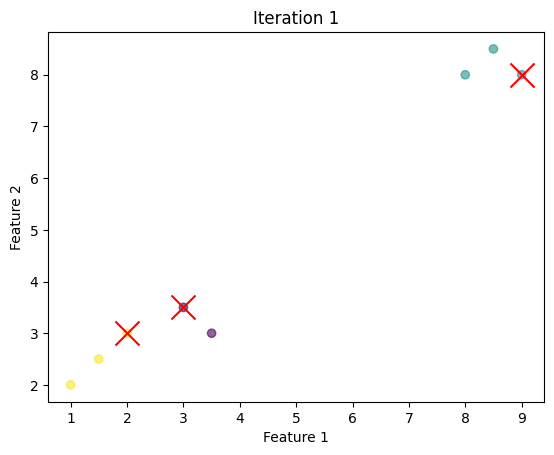

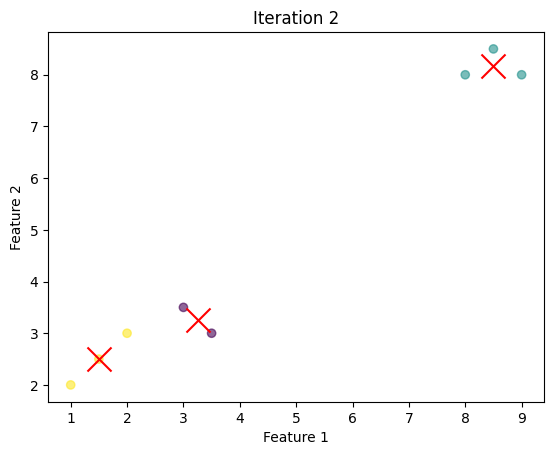

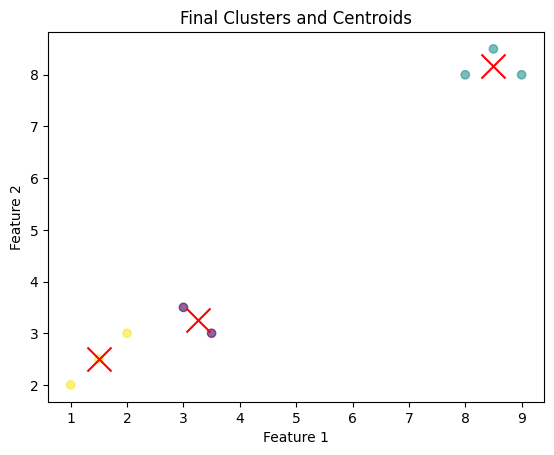

Centroids:
[[3.25       3.25       2.25      ]
 [8.5        8.16666667 8.        ]
 [1.5        2.5        1.33333333]]


In [ ]:
import pandas as pd

# Tạo dữ liệu
data_pd = {
    'Feature 1': [2.0, 3.0, 3.5, 8.0, 8.5, 9.0, 1.0, 1.5],
    'Feature 2': [3.0, 3.5, 3.0, 8.0, 8.5, 8.0, 2.0, 2.5],
    'Feature 3': [1.5, 2.0, 2.5, 7.5, 8.0, 8.5, 1.0, 1.5]
}

# Chuyển đổi thành DataFrame
df = pd.DataFrame(data)
data = df.to_numpy()


# Hiển thị DataFrame
print(df)

# Chạy thuật toán K-Means với k=2, k=3, và k=4
kmeans = KMeans(k=3)
kmeans.fit(data)

print("Centroids:")
print(kmeans.centroids)


#***KHOẢNG CÁCH***

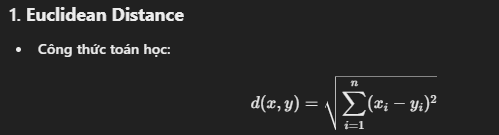

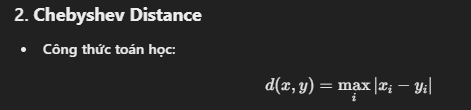

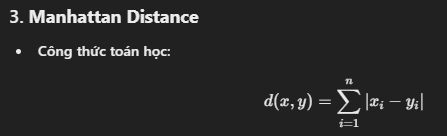

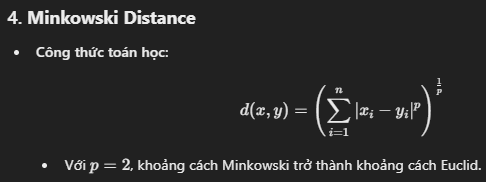

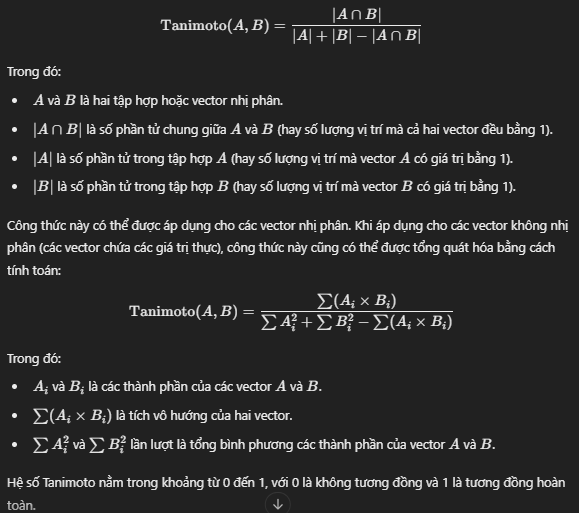

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(vector, X_data):
    return np.sqrt(np.sum((X_data - vector) ** 2, axis=1))

def chebyshev_distance(vector, X_data):
    return np.max(np.abs(X_data - vector), axis=1)

def manhattan_distance(vector, X_data):
    return np.sum(np.abs(X_data - vector), axis=1)

def minkowski_distance(vector, X_data, p=2):
    return np.sum(np.abs(X_data - vector) ** p, axis=1) ** (1 / p)

def tanimoto_distance(vector, X_data):
    # Tính tích vô hướng giữa vector và X_data
    dot_product = np.sum(vector * X_data, axis=1)

    # Tính tổng bình phương của vector
    sum_square_vector = np.sum(vector ** 2)

    # Tính tổng bình phương của X_data
    sum_square_X_data = np.sum(X_data ** 2, axis=1)

    # Tính khoảng cách Tanimoto
    return 1 - (dot_product / (sum_square_vector + sum_square_X_data - dot_product))

# Dữ liệu đầu vào
vector = np.array([1, 2])
X_data = np.array([[4, 5], [3, 2], [5, 8], [1, 5]])

# Tính các loại khoảng cách
euclidean_distances = euclidean_distance(vector, X_data) #np.sqrt(np.sum((X_data - vector) ** 2, axis=1))
chebyshev_distances = chebyshev_distance(vector, X_data) #np.max(np.abs(X_data - vector), axis=1)
manhattan_distances = manhattan_distance(vector, X_data) #np.sum(np.abs(X_data - vector), axis=1)
minkowski_distances = minkowski_distance(vector, X_data, p=3) #np.sum(np.abs(X_data - vector) ** 3, axis=1) ** (1 / 3)
tanimoto_distances = tanimoto_distance(vector, X_data)

# Visualization
fig, ax = plt.subplots()

# Vẽ các điểm dữ liệu và vector
ax.scatter(X_data[:, 0], X_data[:, 1], c='blue', label='X_data Points')
ax.scatter(vector[0], vector[1], c='red', label='Vector')
ax.scatter(0, 0, c='black', label='O')

# Gắn nhãn khoảng cách
for i, (x, y) in enumerate(X_data):
    ax.text(x + 0.1, y, f'Euclidean: {euclidean_distances[i]:.2f}\n'
                        f'Chebyshev: {chebyshev_distances[i]:.2f}\n'
                        f'Manhattan: {manhattan_distances[i]:.2f}\n'
                        f'Minkowski: {minkowski_distances[i]:.2f}\n'
                        f'Tanimoto:  {tanimoto_distances[i]:.2f}', fontsize=9)

# Vẽ các đường kết nối vector đến các điểm dữ liệu
for i in range(len(X_data)):
    ax.plot([vector[0], X_data[i, 0]], [vector[1], X_data[i, 1]], 'k--')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
ax.set_title('Visualization of Vectors and Distances')
plt.grid(True)
plt.show()

# ***CODE COPY LINH TINH CHƯA KỊP TEST***

In [ ]:
import numpy as np
from collections import Counter

# B1: Chuẩn bị dữ liệu và chọn số lượng hàng xóm (k)
# Dữ liệu mẫu (giả định)
X_train = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8], [5, 5], [8, 6]])
y_train = np.array([0, 0, 0, 1, 1, 1, 1])  # Nhãn của các điểm dữ liệu

# Dữ liệu kiểm tra
X_test = np.array([[5, 5], [2, 4]])

# Chọn số lượng hàng xóm k
k = 3

# B2: Tính toán khoảng cách
def euclidean_distance(x1, x2):
    """Hàm tính khoảng cách Euclid giữa hai điểm x1 và x2"""
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

def manhattan_distance(x1, x2):
    """Hàm tính khoảng cách Manhattan giữa hai điểm x1 và x2"""
    distance = np.sum(np.abs(x1 - x2))
    return distance

# B3: Sắp xếp và chọn hàng xóm
def get_neighbors(X_train, y_train, x_test, k, distance_func):
    """Hàm tìm k hàng xóm gần nhất cho điểm x_test"""
    distances = []
    for i in range(len(X_train)):
        distance = distance_func(X_train[i], x_test)
        distances.append((distance, y_train[i]))

    # Sắp xếp khoảng cách theo thứ tự tăng dần
    distances.sort(key=lambda x: x[0])

    # Chọn k hàng xóm gần nhất
    neighbors = distances[:k]
    return neighbors

# B4: Bỏ phiếu (majority voting) và Dự đoán nhãn
def predict(X_train, y_train, X_test, k, distance_func):
    """Hàm dự đoán nhãn cho tập X_test"""
    predictions = []
    for x_test in X_test:
        neighbors = get_neighbors(X_train, y_train, x_test, k, distance_func)

        # Lấy nhãn của các hàng xóm
        labels = [neighbor[1] for neighbor in neighbors]

        # Bỏ phiếu và chọn nhãn phổ biến nhất
        most_common = Counter(labels).most_common(1)
        predictions.append(most_common[0][0])

    return predictions

# B5: Đánh giá mô hình với giá trị k
def evaluate_k(X_train, y_train, X_test, y_test, max_k):
    """Hàm đánh giá các giá trị k từ 1 đến max_k để tìm k tốt nhất"""
    best_k = 1
    best_accuracy = 0

    for k in range(1, max_k + 1):
        y_pred = predict(X_train, y_train, X_test, k, euclidean_distance)

        # Tính độ chính xác
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        print(f"Accuracy with k={k}: {accuracy:.2f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k

    print(f"Best k: {best_k} with accuracy: {best_accuracy:.2f}")
    return best_k

# Gọi hàm evaluate_k để tìm giá trị k tốt nhất cho tập kiểm tra giả định
y_test = np.array([1, 0])  # Nhãn thật cho tập X_test
best_k = evaluate_k(X_train, y_train, X_test, y_test, max_k=5)

# Dự đoán với k tốt nhất
y_pred = predict(X_train, y_train, X_test, best_k, euclidean_distance)
print(f"Final predictions with best k={best_k}: {y_pred}")

In [ ]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# B1: Chuẩn bị dữ liệu và chọn số lượng hàng xóm (k)
# Dữ liệu mẫu (giả định)
X = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8], [5, 5], [8, 6]])
y = np.array([0, 0, 0, 1, 1, 1, 1])  # Nhãn của các điểm dữ liệu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chọn số lượng hàng xóm k
k = 3

# B2: Tính toán khoảng cách
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# B3: Sắp xếp và chọn hàng xóm
def get_neighbors(X_train, y_train, x_test, k, distance_func):
    distances = []
    for i in range(len(X_train)):
        distance = distance_func(X_train[i], x_test)
        distances.append((distance, y_train[i]))

    # Sắp xếp khoảng cách theo thứ tự tăng dần
    distances.sort(key=lambda x: x[0])

    # Chọn k hàng xóm gần nhất
    neighbors = distances[:k]
    return neighbors

# B4: Bỏ phiếu (majority voting) và Dự đoán nhãn
def predict(X_train, y_train, X_test, k, distance_func):
    predictions = []
    for x_test in X_test:
        neighbors = get_neighbors(X_train, y_train, x_test, k, distance_func)

        # Lấy nhãn của các hàng xóm
        labels = [neighbor[1] for neighbor in neighbors]

        # Bỏ phiếu và chọn nhãn phổ biến nhất
        most_common = Counter(labels).most_common(1)
        predictions.append(most_common[0][0])

    return predictions

# B5: Duyệt k = ? → Đánh giá và chọn k tốt nhất
def evaluate_k(X_train, y_train, X_test, y_test, max_k):
    best_k = 1
    best_accuracy = 0
    for k in range(1, max_k + 1):
        y_pred = predict(X_train, y_train, X_test, k, euclidean_distance)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy with k={k}: {accuracy:.2f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k

    print(f"Best k: {best_k} with accuracy: {best_accuracy:.2f}")
    return best_k

# Gọi hàm evaluate_k để tìm giá trị k tốt nhất
best_k = evaluate_k(X_train, y_train, X_test, y_test, max_k=5)

# Sử dụng k tốt nhất để dự đoán trên tập kiểm tra và đánh giá kết quả
y_pred = predict(X_train, y_train, X_test, best_k, euclidean_distance)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final accuracy with best k={best_k}: {accuracy:.2f}")